# Kmeans example

In [1]:
# import necessary libraries
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
income_d = pd.read_csv('./csv/income.csv') 
income_d.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


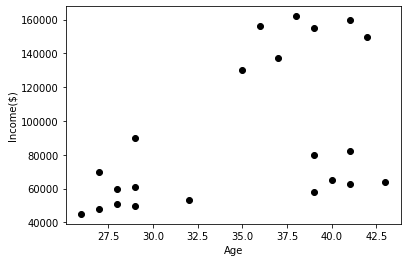

In [3]:
plt.scatter(income_d['Age'], income_d['Income($)'], color='k')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [4]:
k = KMeans(n_clusters=3)
k

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
# Fit and predict
y_predicted = k.fit_predict(income_d[['Age','Income($)']]) # This statement means it run k-means algorithm
# on age and income and computed according to 3 cluster
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [6]:
# We need to see the clustering result using a plot. So, add this cluster column
income_d['cluster'] = y_predicted
income_d.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


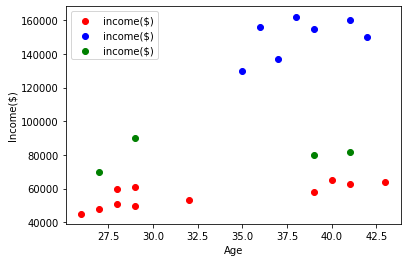

In [7]:
# We need to cleate seperate dataframe clusterwise
mask1 = income_d['cluster']==0
mask2 = income_d['cluster']==1
mask3 = income_d['cluster']==2

df1 = income_d[mask1]
df2 = income_d[mask2]
df3 = income_d[mask3]

plt.scatter(df1['Age'],df1['Income($)'], color = 'r', label = 'income($)')
plt.scatter(df2['Age'],df2['Income($)'], color = 'b', label = 'income($)')
plt.scatter(df3['Age'],df3['Income($)'], color = 'g', label = 'income($)')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

Problem with red cluster, green cluster. They are not grouped correctly. This happened because our scaling is not right. Age in between only 27.5-42.5 and Income in between 40000-160000. So we need to scale the data using **MinMaxScaler**

In [8]:
scaler = MinMaxScaler()

scaler.fit(income_d[['Income($)']])
income_d['Income($)'] = scaler.transform(income_d[['Income($)']])

scaler.fit(income_d[['Age']])
income_d['Age'] = scaler.transform(income_d[['Age']])

income_d.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


# Use kmeans algorithm to this scaled dataset

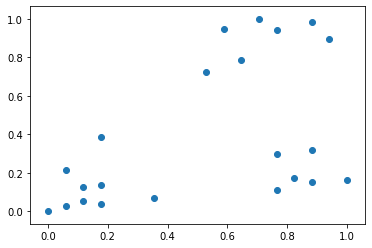

In [9]:
plt.scatter(income_d['Age'],income_d['Income($)'])

In [10]:
kk = KMeans(n_clusters=3)
kk

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
y_pdict = kk.fit_predict(income_d[['Age','Income($)']])

y_pdict

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [12]:
income_d['f_cluster'] = y_pdict
income_d.head()

,Name,Age,Income($),cluster,f_cluster
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,2


In [13]:
kk.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [14]:
data1 = income_d[income_d['f_cluster']==0]
data2 = income_d[income_d['f_cluster']==1]
data3 = income_d[income_d['f_cluster']==2]

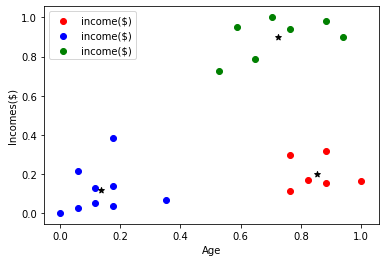

In [15]:
plt.scatter(data1['Age'],data1['Income($)'], color = 'r', label = 'income($)')
plt.scatter(data2['Age'],data2['Income($)'], color = 'b', label = 'income($)')
plt.scatter(data3['Age'],data3['Income($)'], color = 'g', label = 'income($)')
# To plot centroid
plt.scatter(kk.cluster_centers_[:,0], kk.cluster_centers_[:,1], color='k', marker='*')

plt.xlabel('Age')
plt.ylabel('Incomes($)')
plt.legend()
plt.show()

## Elbow plot

In [16]:
num_k = range(1,10)
sse = []
for k1 in num_k:
    km = KMeans(n_clusters = k1)
    km.fit(income_d[['Age','Income($)']])
    sse.append(km.inertia_)  # To find some of square error
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.22020960864009398,
 0.16858512236029757,
 0.13265419827245162,
 0.10383752586603559]

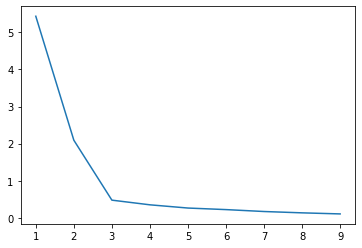

In [17]:
plt.plot(num_k, sse, )